In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
##from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## 1. Chương 1 : Đọc dữ liệu và Tiền xử lý 

In [3]:
df = pd.read_csv("C:/Users/84346/Desktop/Google-Playstore.csv")

In [22]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
#Xóa những cột không cần thiết
df.drop(['App Name', 'App Id','Developer Website','Developer Email','Developer Id','Privacy Policy', 'Released','Last Updated','Currency'],axis=1,inplace=True)

In [5]:
df.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,7.1 and up,Everyone,False,False,False,2021-06-15 20:19:35
1,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,5.0 and up,Everyone,True,False,False,2021-06-15 20:19:35
2,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,4.0.3 and up,Everyone,False,False,False,2021-06-15 20:19:35
3,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,4.0.3 and up,Everyone,True,False,False,2021-06-15 20:19:35
4,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,4.1 and up,Everyone,False,False,False,2021-06-15 20:19:35


## 1.1. Xử lý dữ liệu bị mất


In [6]:
#Đếm số lượng dữ liệu bị mất của từng cột
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have \t{1}   null value'.format(col,null))

Category have 	0   null value
Rating have 	22883   null value
Rating Count have 	22883   null value
Installs have 	107   null value
Minimum Installs have 	107   null value
Maximum Installs have 	0   null value
Free have 	0   null value
Price have 	0   null value
Size have 	196   null value
Minimum Android have 	6530   null value
Content Rating have 	0   null value
Ad Supported have 	0   null value
In App Purchases have 	0   null value
Editors Choice have 	0   null value
Scraped Time have 	0   null value


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          object 
 1   Rating            float64
 2   Rating Count      float64
 3   Installs          object 
 4   Minimum Installs  float64
 5   Maximum Installs  int64  
 6   Free              bool   
 7   Price             float64
 8   Size              object 
 9   Minimum Android   object 
 10  Content Rating    object 
 11  Ad Supported      bool   
 12  In App Purchases  bool   
 13  Editors Choice    bool   
 14  Scraped Time      object 
dtypes: bool(4), float64(4), int64(1), object(6)
memory usage: 202.9+ MB


In [8]:
#Xóa những dòng dữ liệu bị mất vì số lượng dữ liệu bị mất không đáng kể
##df.fillna(method='bfill',inplace=True)
df = df.dropna()

In [9]:
#Đếm lại
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

Category have 0   null value
Rating have 0   null value
Rating Count have 0   null value
Installs have 0   null value
Minimum Installs have 0   null value
Maximum Installs have 0   null value
Free have 0   null value
Price have 0   null value
Size have 0   null value
Minimum Android have 0   null value
Content Rating have 0   null value
Ad Supported have 0   null value
In App Purchases have 0   null value
Editors Choice have 0   null value
Scraped Time have 0   null value


## 1.2. Chuyển đổi kiểu dữ liệu cột Installs thành kiểu int

In [10]:
#Các lệnh sẽ loại dấu ',' và '+' trong giá trị của installs
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

df['Installs'] = df['Installs'].apply(string_to_numeric)

c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\84346\Desktop\pred

[]

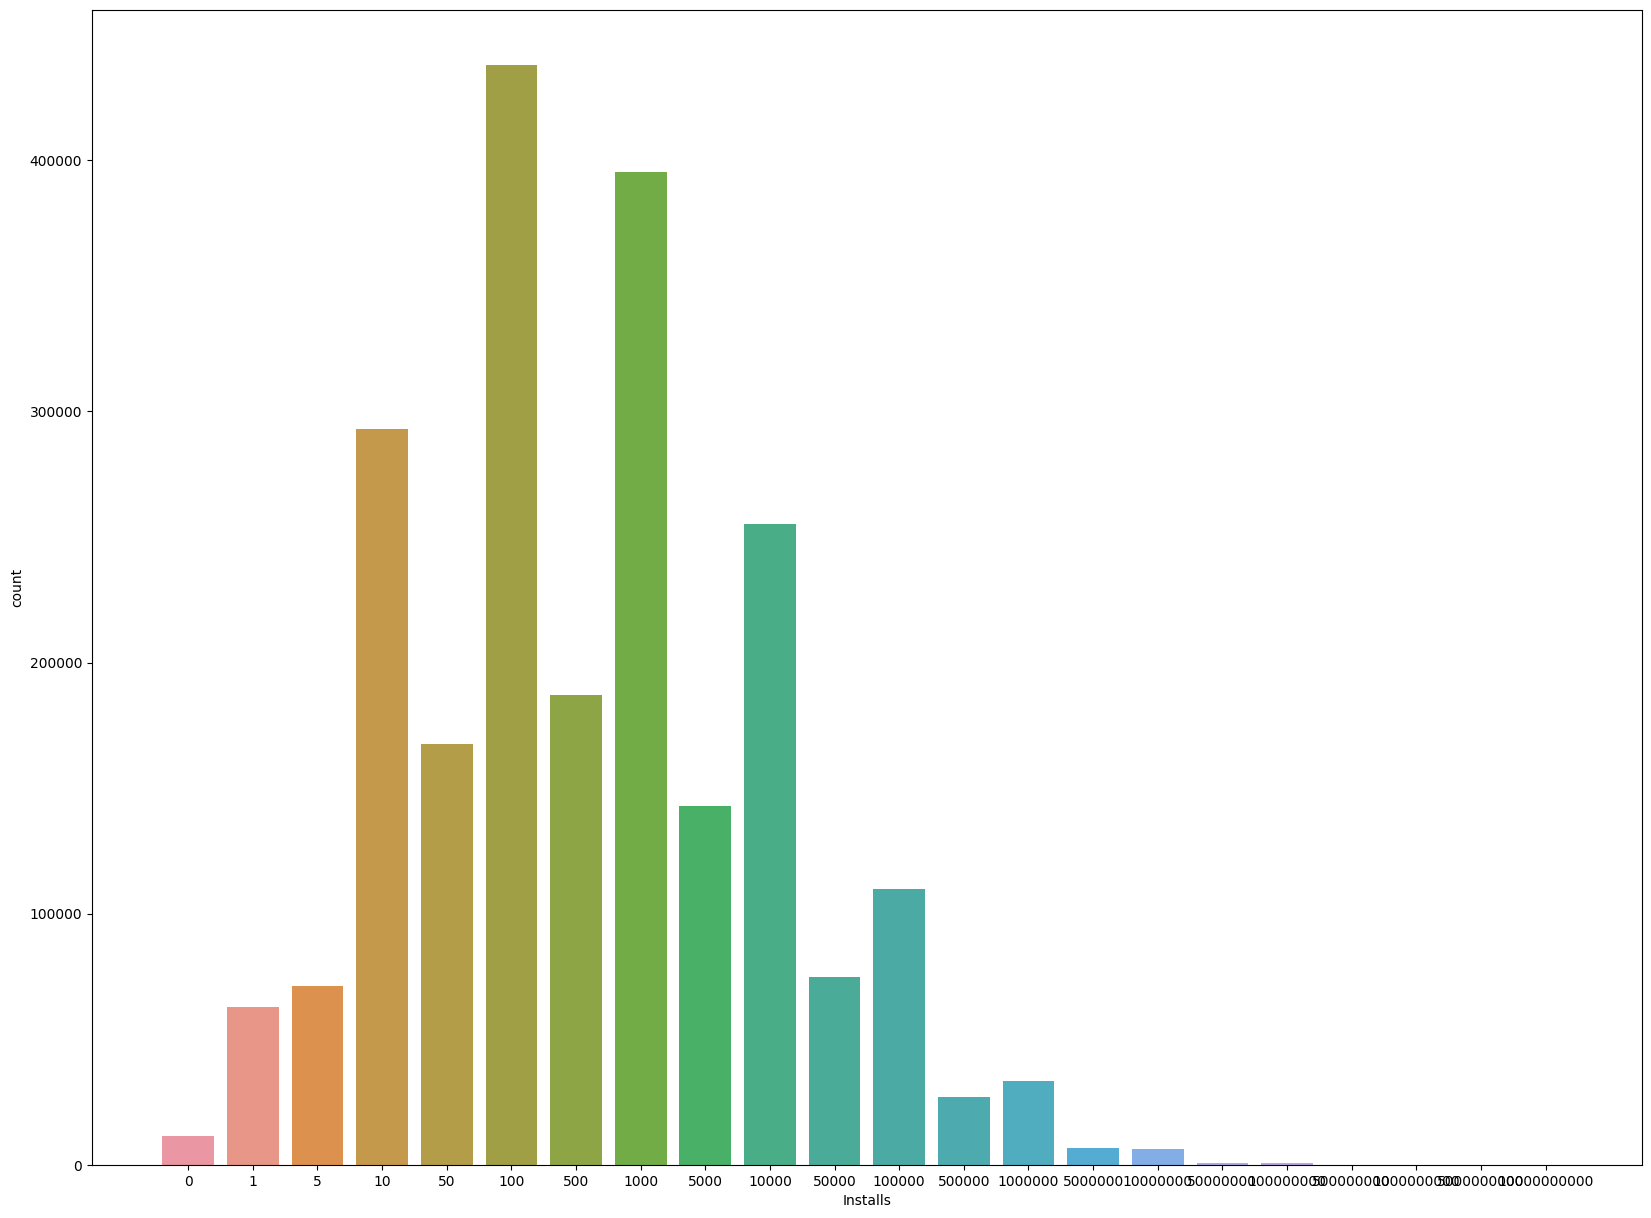

In [11]:
plt.figure(figsize=(20,15))
sns.countplot(df['Installs'])
plt.plot()

## 1.3.  Chuyển đổi kiểu dữ liệu cột Size thành kiểu int

In [12]:
#Đổi các kích thước về Kilobyte
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000
df['Size']=df['Size'].apply(define_size)

## 1.4.  Chuyển đổi kiểu dữ liệu cột Content Rating thành dạng số để phù hợp với đầu vào

In [13]:
#Xem các giá trị trong cột Content Rating
df['Content Rating'].value_counts()

Content Rating
Everyone           1996767
Teen                193733
Mature 17+           59590
Everyone 10+         33160
Unrated                154
Adults only 18+        131
Name: count, dtype: int64

In [14]:
#Gán nhãn cho từng giá trị trong cột 
lbl_content_rating=LabelEncoder()
df['Content Rating']=lbl_content_rating.fit_transform(df['Content Rating'])

In [15]:
df['Content Rating'].value_counts()

Content Rating
1    1996767
4     193733
3      59590
2      33160
5        154
0        131
Name: count, dtype: int64

## 1.5.  Chuyển đổi kiểu dữ liệu cột Minimum Android Version thành dạng số để phù hợp với đầu vào

In [16]:
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
df['Minimum Android']=df['Minimum Android'].apply(min_android)

c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\84346\Desktop\predict-product-rating-on-Google-Play-Store\.venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\84346\Desktop\pred

[]

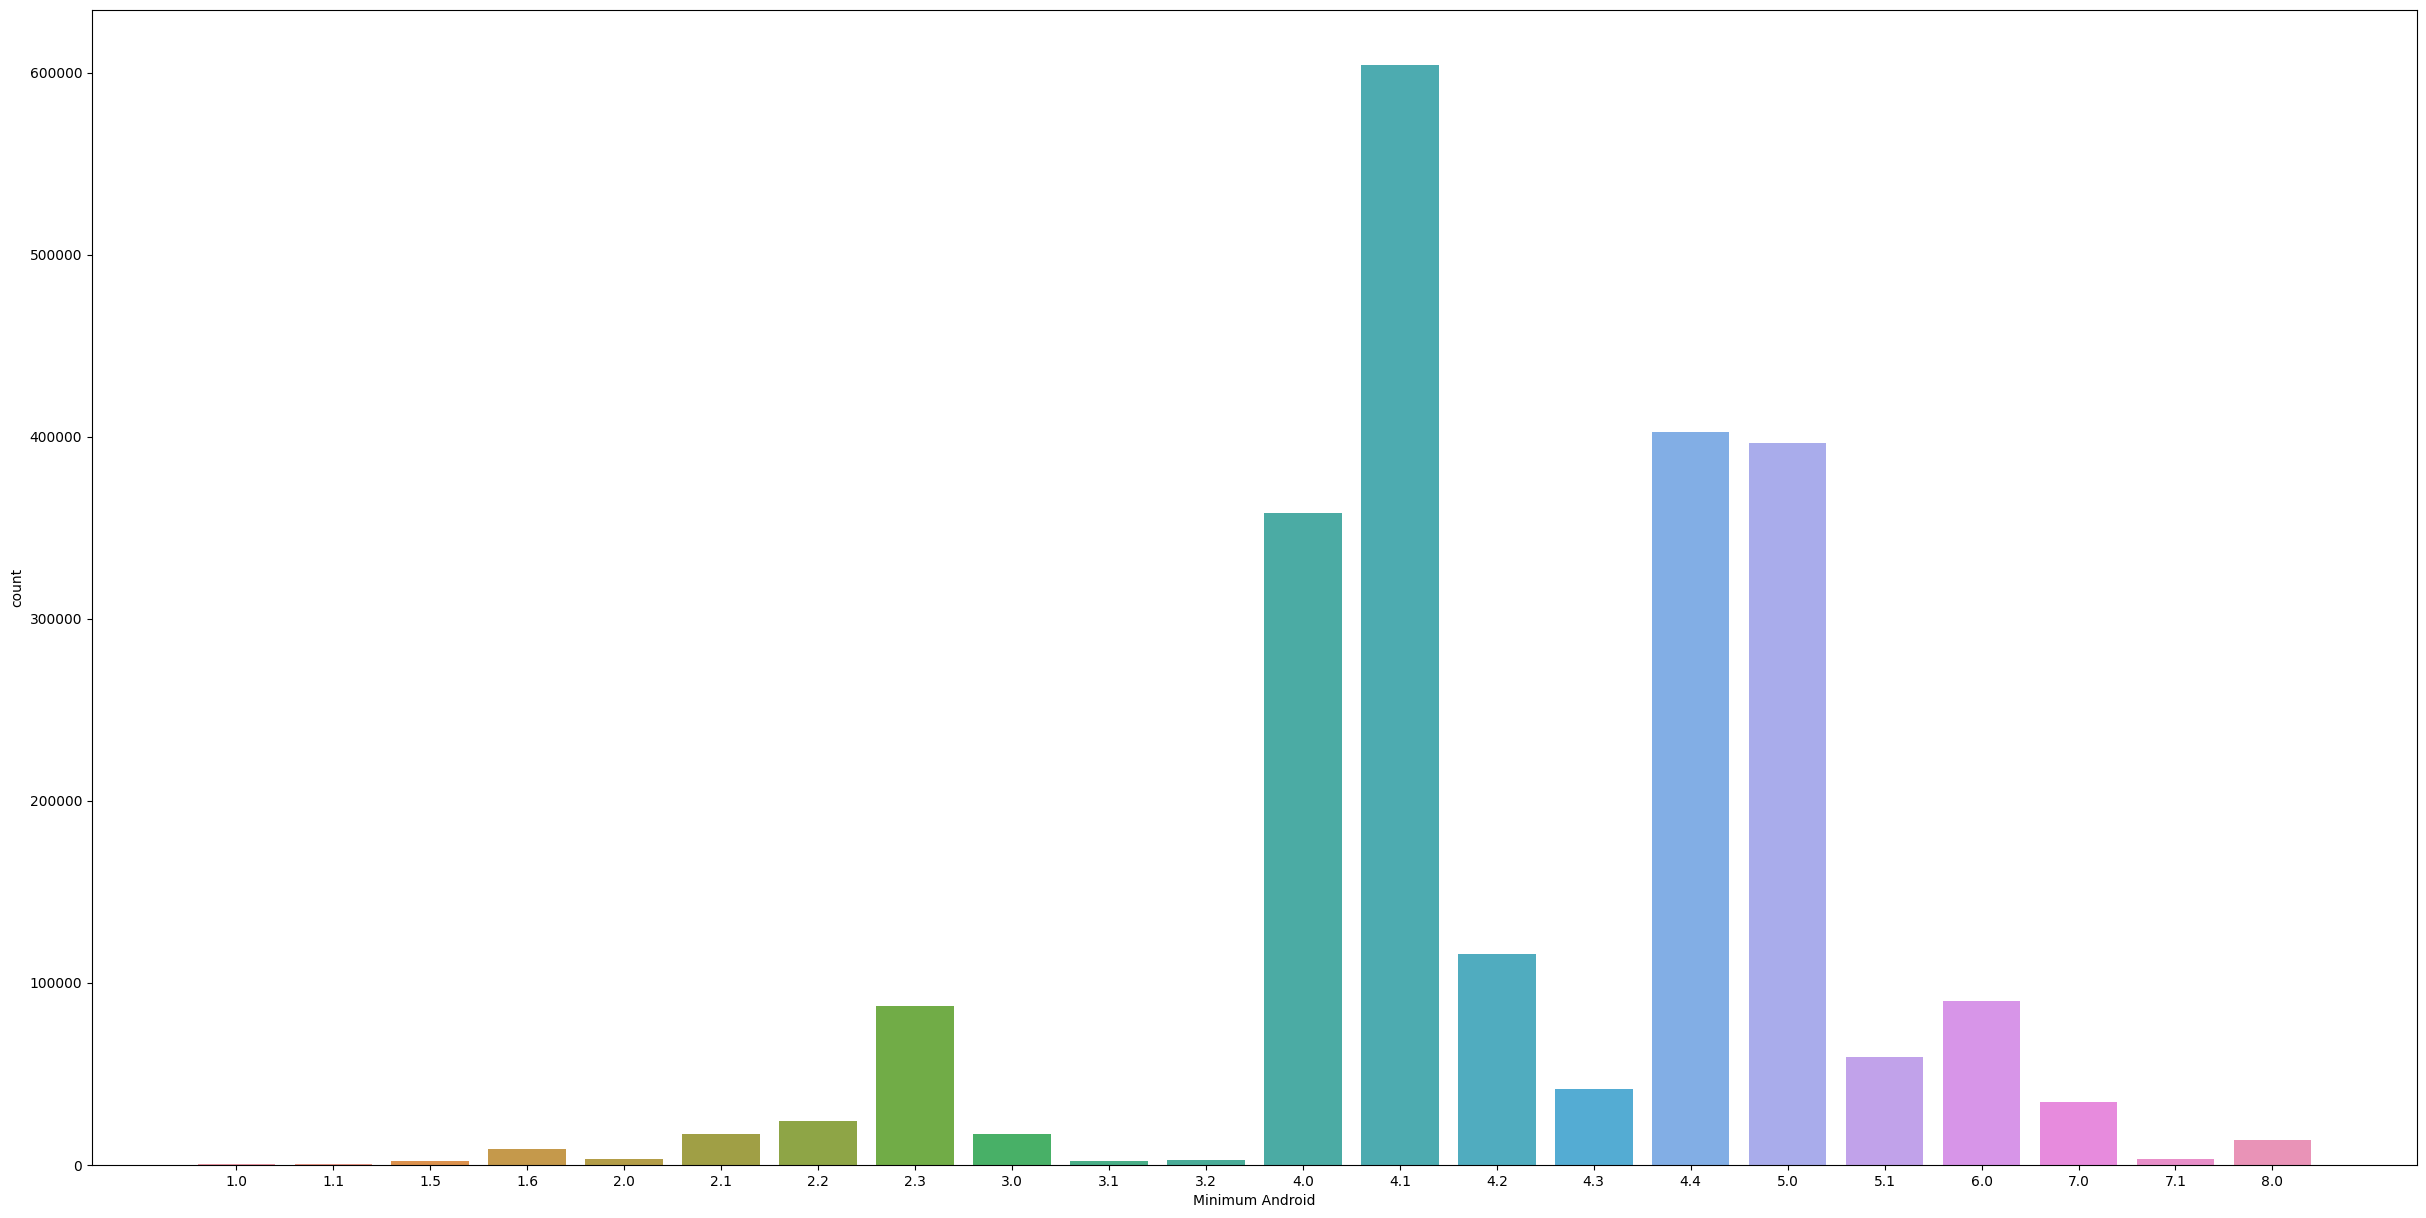

In [17]:
plt.figure(figsize=(30,15))
sns.countplot(df['Minimum Android'])
plt.plot()

## 1.6.  Chuyển đổi kiểu dữ liệu cột Category thành dạng số để phù hợp với đầu vào

In [18]:
#Xem các giá trị của Category
df['Category'].value_counts()

Category
Education                  239244
Music & Audio              154381
Business                   141630
Tools                      141363
Entertainment              137280
Lifestyle                  117588
Books & Reference          116349
Personalization             88785
Health & Fitness            82340
Productivity                77848
Shopping                    74645
Food & Drink                73292
Travel & Local              66494
Finance                     64488
Arcade                      52441
Puzzle                      50090
Casual                      49060
Communication               47366
Sports                      46913
Social                      43956
News & Magazines            42492
Photography                 35333
Medical                     31539
Action                      26691
Maps & Navigation           26268
Adventure                   22710
Simulation                  22654
Educational                 20962
Art & Design                18321
Auto 

In [19]:
#Gán nhãn cho từng giá trị trong cột
lbl_category=LabelEncoder()
df['Category']=lbl_category.fit_transform(df['Category'])

In [20]:
#Xem các giá trị của Category sau khi gán nhãn
df['Category'].value_counts()

Category
15    239244
28    154381
8     141630
42    141363
17    137280
24    117588
7     116349
31     88785
21     82340
33     77848
37     74645
20     73292
43     66494
19     64488
2      52441
34     50090
11     49060
13     47366
40     46913
39     43956
29     42492
32     35333
26     31539
0      26691
25     26268
1      22710
38     22654
16     20962
3      18321
4      17869
22     14119
45     13906
18     12631
44     11656
5      11640
6      10417
35     10148
36      9607
47      8512
41      8200
9       8025
46      7106
14      6419
23      5048
10      5019
27      4128
30      3747
12      2815
Name: count, dtype: int64

## 1.7.  Chuyển đổi kiểu dữ liệu cột Free thành dạng bool

In [21]:
df.Free.value_counts()

Free
True     2238972
False      44563
Name: count, dtype: int64

In [22]:
df.Free=pd.Categorical(df.Free,ordered=True,categories=[False,True]).codes

In [23]:
df.Free.value_counts()

Free
1    2238972
0      44563
Name: count, dtype: int64

## 1.8.  Chuyển đổi kiểu dữ liệu cột Ad Supported thành dạng bool

In [24]:
df['Ad Supported'].value_counts()

Ad Supported
True     1141865
False    1141670
Name: count, dtype: int64

In [25]:
df['Ad Supported']=pd.Categorical(df['Ad Supported'],ordered=True,categories=[False,True]).codes

In [26]:
df['Ad Supported'].value_counts()

Ad Supported
1    1141865
0    1141670
Name: count, dtype: int64

## 1.9.  Chuyển đổi kiểu dữ liệu cột In App Purchases thành dạng bool

In [27]:
df['In App Purchases'].value_counts()

In App Purchases
False    2091414
True      192121
Name: count, dtype: int64

In [28]:
df['In App Purchases']=pd.Categorical(df['In App Purchases'],ordered=True,categories=[False,True]).codes

In [29]:
df['In App Purchases'].value_counts()

In App Purchases
0    2091414
1     192121
Name: count, dtype: int64

## 1.10.  Chuyển đổi kiểu dữ liệu cột In Editors Choice thành dạng bool

In [30]:
df['Editors Choice'].value_counts()

Editors Choice
False    2282683
True         852
Name: count, dtype: int64

In [31]:
df['Editors Choice']=pd.Categorical(df['Editors Choice'],ordered=True,categories=[False,True]).codes

In [32]:
df['Editors Choice'].value_counts()

Editors Choice
0    2282683
1        852
Name: count, dtype: int64

## *Như vậy, ta đã có dữ liệu sạch để dùng để dự đoán.

In [41]:
df.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,1,0.0,0.0,10,10.0,15,1,0.0,10000.0,7.1,1,0,0,0
1,42,4.4,64.0,5000,5000.0,7662,1,0.0,2900.0,5.0,1,1,0,0
2,33,0.0,0.0,50,50.0,58,1,0.0,3700.0,4.0,1,0,0,0
3,13,5.0,5.0,10,10.0,19,1,0.0,1800.0,4.0,1,1,0,0
4,42,0.0,0.0,100,100.0,478,1,0.0,6200.0,4.1,1,0,0,0


In [34]:
df.drop(['Scraped Time'],axis=1,inplace=True)

[]

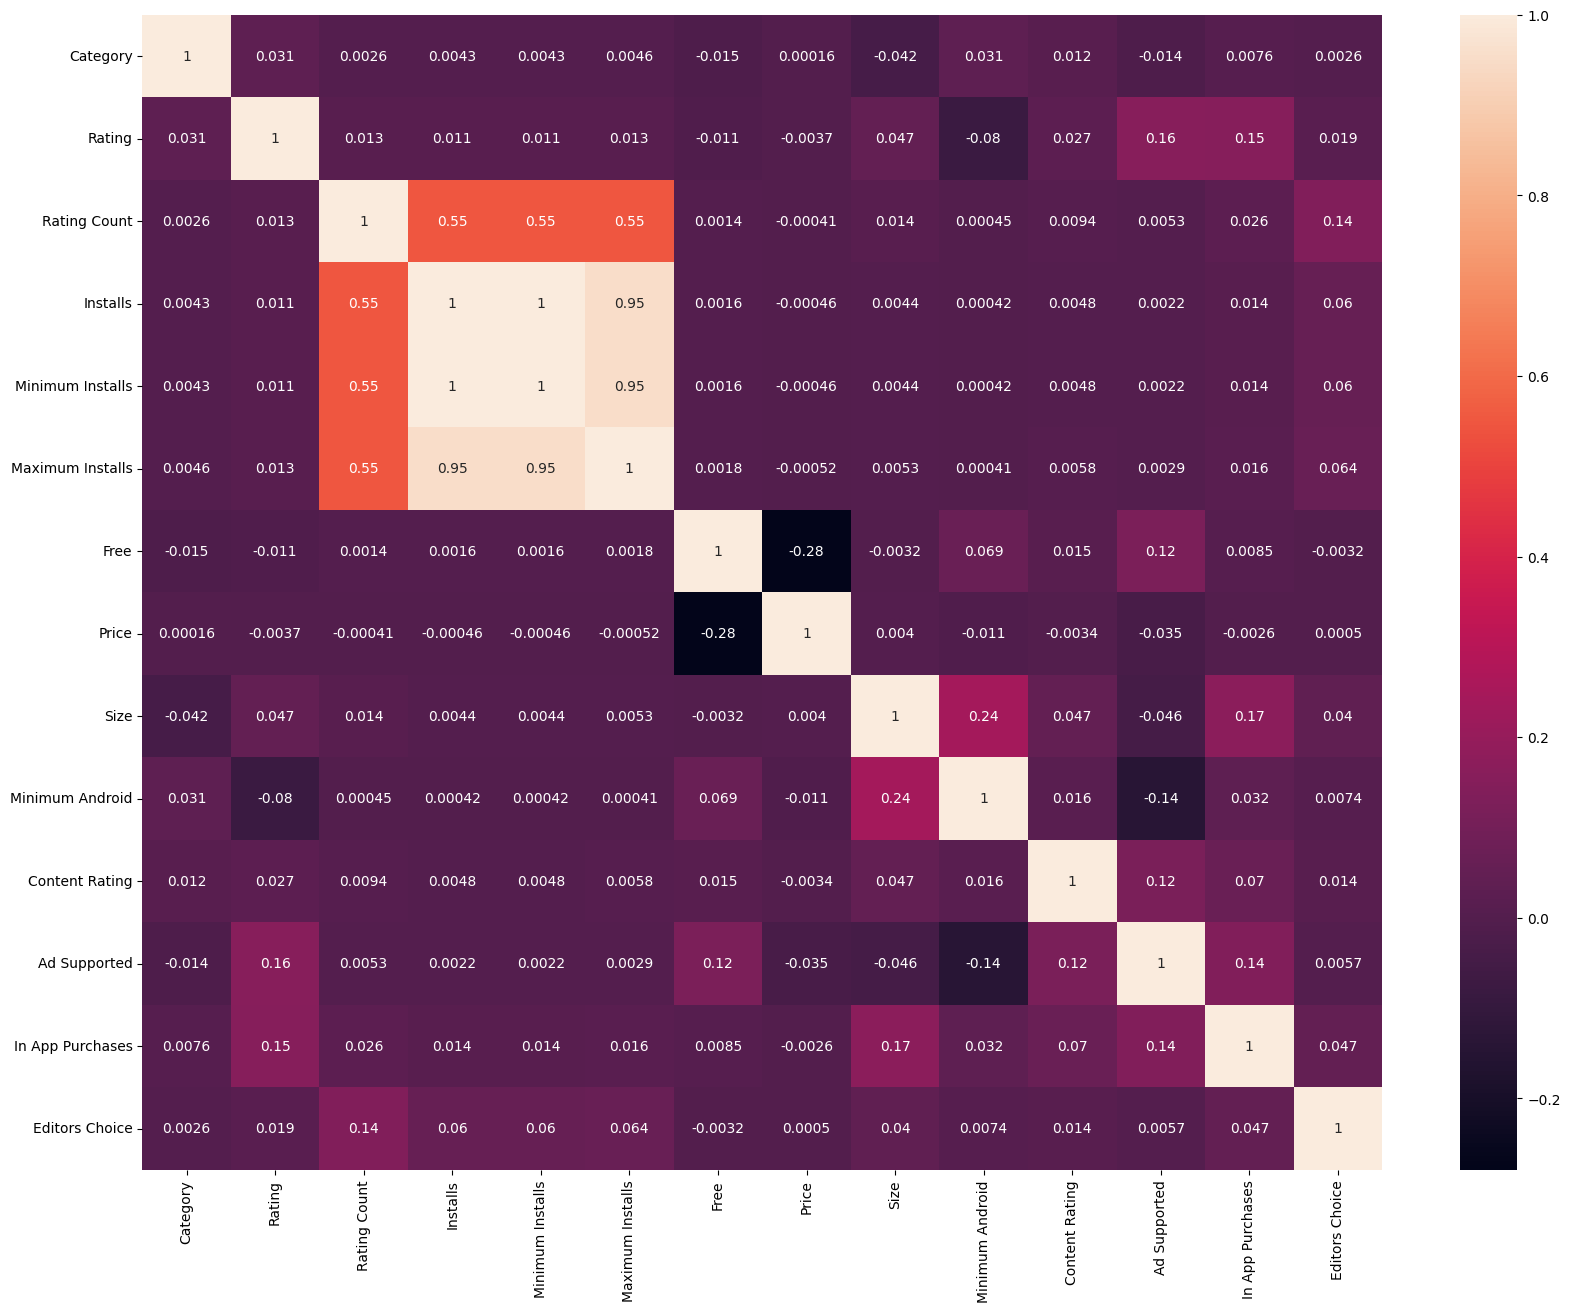

In [42]:
#Xem sự tương đồng giữa các thuộc tính
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [43]:
# Linear Regression
X = df.drop(['Rating'], axis=1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# predict the value of installs


Mean Absolute Error: 1.939061850793028
Mean Squared Error: 4.198444724207066
Root Mean Squared Error: 2.0490106696176733


In [44]:
X_test

,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
186370,15,0.0,100,100.0,105,1,0.0,9400.0,4.4,1,0,0,0
1874224,33,5.0,100,100.0,125,1,0.0,1800.0,4.1,1,0,0,0
1201034,21,0.0,100,100.0,310,1,0.0,8800.0,4.4,1,1,0,0
401821,40,138.0,10000,10000.0,14272,1,0.0,1000.0,4.0,1,1,0,0
1176311,17,0.0,100,100.0,145,1,0.0,5700.0,6.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633224,7,9.0,100,100.0,365,1,0.0,59000.0,4.1,1,1,0,0
390196,7,33.0,5000,5000.0,8387,1,0.0,4800.0,4.1,1,1,0,0
713739,17,449.0,50000,50000.0,53980,1,0.0,1000.0,4.0,1,1,0,0
408371,26,0.0,100,100.0,104,1,0.0,74000.0,6.0,1,0,0,0


In [64]:
X_test[:1]

,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
186370,15,0.0,100,100.0,105,1,0.0,9400.0,4.4,1,0,0,0


In [65]:
X_test[:1]
print(model.predict(X_test[:2]))

[1.72812981 1.86126593]


In [48]:
import pickle
 
# save the model to disk
filename = 'linear_regression_model1'
pickle.dump(model, open(filename, 'wb'))